<a href="https://colab.research.google.com/github/VietHuongUIT/Data_Mining_report/blob/main/B%E1%BA%A3n_sao_c%E1%BB%A7a_crawl_tweets_elon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/tweepy/tweepy.git

fatal: destination path 'tweepy' already exists and is not an empty directory.


In [2]:
!pip3 install pip --upgrade

In [3]:
!pip3 install ./tweepy/

Processing ./tweepy
  Preparing metadata (setup.py) ... done
  Created wheel for tweepy: filename=tweepy-4.9.0-py3-none-any.whl size=90961 sha256=31e03c0b0db58851bd8612fc3033bf162f43f691f0382fd9206e9a8016b27eb3
  Stored in directory: /tmp/pip-ephem-wheel-cache-dfes_st1/wheels/5e/ac/21/16d34f5f532b9fb2963f1422353f0075a0b3a193d5648a7c00
Successfully built tweepy
  Attempting uninstall: tweepy
    Found existing installation: tweepy 4.9.0
    Uninstalling tweepy-4.9.0:
      Successfully uninstalled tweepy-4.9.0


In [4]:
import tweepy

client = tweepy.Client("AAAAAAAAAAAAAAAAAAAAAAaWcgEAAAAAYDkJMoNoT4DRUQDjPmIvF%2BNh66Q%3DrFe064H1lOy8snN9lwtsYRW9kfjO37LvfAPwoGSEASxU2OEwSy")

In [5]:
a = client.get_user(username="elonmusk")

In [6]:
print(a)

Response(data=<User id=44196397 name=Elon Musk username=elonmusk>, includes={}, errors=[], meta={})


In [7]:
import datetime
start_time = datetime.datetime(2022, 1, 14, 0, 0, 0, 0, datetime.timezone.utc)
end_time = datetime.datetime(2022, 5, 14, 0, 0, 0, 0, datetime.timezone.utc)

In [8]:

b = client.get_users_tweets(id=44196397, max_results=100, end_time=end_time, start_time=start_time)

In [9]:
b.data

[<Tweet id=1525237681252249600 text='RT @SpaceX: Liftoff! https://t.co/TWmYoVcNjW'>,
 <Tweet id=1525080945274998785 text='Still committed to acquisition'>,
 <Tweet id=1525049369552048129 text='Twitter deal temporarily on hold pending details supporting calculation that spam/fake accounts do indeed represent less than 5% of users\nhttps://t.co/Y2t0QMuuyn'>,
 <Tweet id=1525029640808476673 text='The straw war is emblematic of larger social issues'>,
 <Tweet id=1525029340815056897 text='@Gfilche @Tesla It still needs more work imo, but we can probably widen the beta a little next month'>,
 <Tweet id=1524971392688459778 text='@pmarca This is messed up'>,
 <Tweet id=1524947763129028608 text='@JeffTutorials Seriously?'>,
 <Tweet id=1524930630990974976 text='How did it even start?'>,
 <Tweet id=1524928598418763776 text='@PPathole 💯'>,
 <Tweet id=1524925468381573120 text='@teslaownersSV And tastes like cardboard!'>,
 <Tweet id=1524925223027388416 text='The last straw was the last straw!'>,
 <Tw

In [10]:
# b.data
print(b.data[0]['id'])
print(b.data[0]["text"])

1525237681252249600
RT @SpaceX: Liftoff! https://t.co/TWmYoVcNjW


In [11]:
import pandas as pd
df = pd.DataFrame(b.data)

In [12]:
df

,id,text
0,1525237681252249600,RT @SpaceX: Liftoff! https://t.co/TWmYoVcNjW
1,1525080945274998785,Still committed to acquisition
2,1525049369552048129,Twitter deal temporarily on hold pending detai...
3,1525029640808476673,The straw war is emblematic of larger social i...
4,1525029340815056897,"@Gfilche @Tesla It still needs more work imo, ..."
...,...,...
95,1522426275431731200,RT @NASA: The deorbit burn has begun and the #...
96,1522086750213984257,RT @SpaceX: Dragon separation confirmed! The s...
97,1521998567757426688,"@bevedoni If that’s true, it would make me ver..."
98,1521974692667527168,@CathieDWood Passive/index investment is simpl...


In [13]:
df["id"][0]

1525237681252249600

In [14]:
c = client.get_tweet("1524534310656614400", tweet_fields="created_at")
print(c.data.created_at)

2022-05-11 23:37:58+00:00


In [15]:
c = client.get_tweet(df["id"][0], tweet_fields="created_at")
print(c.data.created_at)

2022-05-13 22:12:55+00:00


In [16]:
# chuyển X và y -> dataframe
def convert(X,y):
    temp=[X,y]
    df = pd.concat(temp,axis=1, join='inner')
    df=pd.DataFrame(df)
    return df

In [17]:
created_array = []
for id in df["id"]:
  temp = client.get_tweet(id, tweet_fields="created_at")
  created_array.append([id,temp.data.created_at])

print(created_array)
# df.merge(created_array,how='cross')
# dataset=convert(df,created_array)
#id_new

[[1525237681252249600, datetime.datetime(2022, 5, 13, 22, 12, 55, tzinfo=datetime.timezone.utc)], [1525080945274998785, datetime.datetime(2022, 5, 13, 11, 50, 6, tzinfo=datetime.timezone.utc)], [1525049369552048129, datetime.datetime(2022, 5, 13, 9, 44, 38, tzinfo=datetime.timezone.utc)], [1525029640808476673, datetime.datetime(2022, 5, 13, 8, 26, 14, tzinfo=datetime.timezone.utc)], [1525029340815056897, datetime.datetime(2022, 5, 13, 8, 25, 3, tzinfo=datetime.timezone.utc)], [1524971392688459778, datetime.datetime(2022, 5, 13, 4, 34, 47, tzinfo=datetime.timezone.utc)], [1524947763129028608, datetime.datetime(2022, 5, 13, 3, 0, 53, tzinfo=datetime.timezone.utc)], [1524930630990974976, datetime.datetime(2022, 5, 13, 1, 52, 48, tzinfo=datetime.timezone.utc)], [1524928598418763776, datetime.datetime(2022, 5, 13, 1, 44, 44, tzinfo=datetime.timezone.utc)], [1524925468381573120, datetime.datetime(2022, 5, 13, 1, 32, 18, tzinfo=datetime.timezone.utc)], [1524925223027388416, datetime.datetime(

In [18]:
import pandas as pd
date_df = pd.DataFrame(created_array)

In [19]:
date_df

,0,1
0,1525237681252249600,2022-05-13 22:12:55+00:00
1,1525080945274998785,2022-05-13 11:50:06+00:00
2,1525049369552048129,2022-05-13 09:44:38+00:00
3,1525029640808476673,2022-05-13 08:26:14+00:00
4,1525029340815056897,2022-05-13 08:25:03+00:00
...,...,...
95,1522426275431731200,2022-05-06 04:01:24+00:00
96,1522086750213984257,2022-05-05 05:32:14+00:00
97,1521998567757426688,2022-05-04 23:41:50+00:00
98,1521974692667527168,2022-05-04 22:06:58+00:00


In [20]:
df_date = date_df.set_axis(["id", "Date"], axis=1, inplace=False)
df_date


,id,Date
0,1525237681252249600,2022-05-13 22:12:55+00:00
1,1525080945274998785,2022-05-13 11:50:06+00:00
2,1525049369552048129,2022-05-13 09:44:38+00:00
3,1525029640808476673,2022-05-13 08:26:14+00:00
4,1525029340815056897,2022-05-13 08:25:03+00:00
...,...,...
95,1522426275431731200,2022-05-06 04:01:24+00:00
96,1522086750213984257,2022-05-05 05:32:14+00:00
97,1521998567757426688,2022-05-04 23:41:50+00:00
98,1521974692667527168,2022-05-04 22:06:58+00:00


In [21]:
merge_df=df_date.merge(df, on='id')

In [22]:
merge_df

,id,Date,text
0,1525237681252249600,2022-05-13 22:12:55+00:00,RT @SpaceX: Liftoff! https://t.co/TWmYoVcNjW
1,1525080945274998785,2022-05-13 11:50:06+00:00,Still committed to acquisition
2,1525049369552048129,2022-05-13 09:44:38+00:00,Twitter deal temporarily on hold pending detai...
3,1525029640808476673,2022-05-13 08:26:14+00:00,The straw war is emblematic of larger social i...
4,1525029340815056897,2022-05-13 08:25:03+00:00,"@Gfilche @Tesla It still needs more work imo, ..."
...,...,...,...
95,1522426275431731200,2022-05-06 04:01:24+00:00,RT @NASA: The deorbit burn has begun and the #...
96,1522086750213984257,2022-05-05 05:32:14+00:00,RT @SpaceX: Dragon separation confirmed! The s...
97,1521998567757426688,2022-05-04 23:41:50+00:00,"@bevedoni If that’s true, it would make me ver..."
98,1521974692667527168,2022-05-04 22:06:58+00:00,@CathieDWood Passive/index investment is simpl...


In [23]:
merge_df = merge_df.set_axis(["id", "Date", "Text"], axis=1, inplace=False)
merge_df


,id,Date,Text
0,1525237681252249600,2022-05-13 22:12:55+00:00,RT @SpaceX: Liftoff! https://t.co/TWmYoVcNjW
1,1525080945274998785,2022-05-13 11:50:06+00:00,Still committed to acquisition
2,1525049369552048129,2022-05-13 09:44:38+00:00,Twitter deal temporarily on hold pending detai...
3,1525029640808476673,2022-05-13 08:26:14+00:00,The straw war is emblematic of larger social i...
4,1525029340815056897,2022-05-13 08:25:03+00:00,"@Gfilche @Tesla It still needs more work imo, ..."
...,...,...,...
95,1522426275431731200,2022-05-06 04:01:24+00:00,RT @NASA: The deorbit burn has begun and the #...
96,1522086750213984257,2022-05-05 05:32:14+00:00,RT @SpaceX: Dragon separation confirmed! The s...
97,1521998567757426688,2022-05-04 23:41:50+00:00,"@bevedoni If that’s true, it would make me ver..."
98,1521974692667527168,2022-05-04 22:06:58+00:00,@CathieDWood Passive/index investment is simpl...


In [24]:
merge_df["Date"] = merge_df["Date"].dt.strftime('%m/%d/%Y')

In [25]:
merge_df

,id,Date,Text
0,1525237681252249600,05/13/2022,RT @SpaceX: Liftoff! https://t.co/TWmYoVcNjW
1,1525080945274998785,05/13/2022,Still committed to acquisition
2,1525049369552048129,05/13/2022,Twitter deal temporarily on hold pending detai...
3,1525029640808476673,05/13/2022,The straw war is emblematic of larger social i...
4,1525029340815056897,05/13/2022,"@Gfilche @Tesla It still needs more work imo, ..."
...,...,...,...
95,1522426275431731200,05/06/2022,RT @NASA: The deorbit burn has begun and the #...
96,1522086750213984257,05/05/2022,RT @SpaceX: Dragon separation confirmed! The s...
97,1521998567757426688,05/04/2022,"@bevedoni If that’s true, it would make me ver..."
98,1521974692667527168,05/04/2022,@CathieDWood Passive/index investment is simpl...


In [26]:
v = merge_df.groupby('Date').Text.apply(list)
pd.DataFrame(v.tolist(), index=v.index)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Date,,,,,,,,,,,,,,,,,,,,,
05/04/2022,"@bevedoni If that’s true, it would make me ver...",@CathieDWood Passive/index investment is simpl...,Interesting. I wonder if those funding these o...,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
05/05/2022,RT @SpaceX: Dragon separation confirmed! The s...,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
05/06/2022,@BillyM2k !!,@waitbutwhy It just keeps happening,@BillyM2k Like thrust on a 🚀!,@WholeMarsBlog Next release (10.12) is another...,@Reuters Copycats!,@Teslarati @KlenderJoey This will trend to wel...,I strongly believe that all managers in a tech...,@skorusARK We must be doing something right!,@kevinmitnick Haha,Another Starlink mission completed https://t.c...,...,"If Twitter acquisition completes, company will...",@WholeMarsBlog I’m a big believer in citizen j...,@nypost This is false. I’ve had no communicati...,@mayemusk @newypost I didn’t ask anyone out or...,RT @NASA: The deorbit burn has begun and the #...,None,None,None,None,None
05/07/2022,@SawyerMerritt Yes! Stop the outrageous false ...,"@WholeMarsBlog At risk of stating the obvious,...",@lexfridman How to find secret doors in Elden ...,"Also, work ethic expectations would be extreme...",@DavidSacks Sage advice in this thread …,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
05/08/2022,@mayemusk @ToscaMusk Happy Mother’s Day!,@hiromichimizuno @SawyerMerritt Correct,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
05/09/2022,@ThierryBreton Great meeting! We are very much...,@RationalEtienne @HindenburgRes You might be r...,"@kangaro0_ @historydefined Int/Dex build, so m...",@waitbutwhy And we’re all descended from a ski...,@NiaRnaM1 @WholeMarsBlog @HIDEO_KOJIMA_EN Dead...,@historydefined It is amazing. I visited in 20...,@HIDEO_KOJIMA_EN Video games are scarier than ...,@HindenburgRes Interesting. Don’t forget to lo...,@historydefined Elden Ring vibes,Chocolate milk is insanely good. Just had some.,...,@historydefined Not be a buzzkill on this issu...,"@Almisehal Thank you for the blessing, but I’m...",@historydefined R2-D2 vibes,@WorldAndScience That won’t be needed https://...,"@nichegamer Seriously, how tough are you reall...",@mayemusk Sorry! I will do my best to stay alive.,"If I die under mysterious circumstances, it’s ...",The word “Nazi” doesn’t mean what he seems to ...,.@Rogozin sent this to Russian media https://t...,@DrEliDavid 🤣
05/10/2022,@bennyjohnson Important to listen to my full e...,@BillyM2k @BNONews Haha 💯,@BillyM2k 🤣,@Tesmanian_com The Tesla China team is amazing,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
05/11/2022,@stevenmarkryan Literally true. Even 100x is p...,@WholeMarsBlog Without billions of miles of tr...,https://t.co/CWWDdur0oz,@henrylmcnamara 🤣,@WholeMarsBlog @akidesir Release notes on this...,@akidesir Probably this weekend. Lot of code u...,@BillyM2k Exactly,Starlink has resisted Russian cyberwar jamming...,None,None,...,None,None,None,None,None,None,None,None,None,None
05/12/2022,@PPathole @BillyM2k Didn’t occur to founders o...,@BillyM2k And also younger than 8000 years old!,@TimRunsHisMouth 🤣🤣 💯,Biden’s mistake is that he thinks he was elect...,Even though I think a less divisive candidate ...,Don’t Diss Information,@mazemoore Disconcerting …,@BillyM2k It has potential as a currency,@slashdot Overzealous DMCA is a plague on huma...,@slashdot Current copyright law in general goe...,...,None,None,None,None,None,None,None,None,None,None


In [28]:
v = merge_df.groupby('Date').Text.apply(list)
columns = (f"Top-{k}" for k in range(1,26))
df_v = pd.DataFrame(v.tolist(), index=v.index, columns=columns)
df_v.head()

,Top-1,Top-2,Top-3,Top-4,Top-5,Top-6,Top-7,Top-8,Top-9,Top-10,...,Top-16,Top-17,Top-18,Top-19,Top-20,Top-21,Top-22,Top-23,Top-24,Top-25
Date,,,,,,,,,,,,,,,,,,,,,
05/04/2022,"@bevedoni If that’s true, it would make me ver...",@CathieDWood Passive/index investment is simpl...,Interesting. I wonder if those funding these o...,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
05/05/2022,RT @SpaceX: Dragon separation confirmed! The s...,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
05/06/2022,@BillyM2k !!,@waitbutwhy It just keeps happening,@BillyM2k Like thrust on a 🚀!,@WholeMarsBlog Next release (10.12) is another...,@Reuters Copycats!,@Teslarati @KlenderJoey This will trend to wel...,I strongly believe that all managers in a tech...,@skorusARK We must be doing something right!,@kevinmitnick Haha,Another Starlink mission completed https://t.c...,...,"If Twitter acquisition completes, company will...",@WholeMarsBlog I’m a big believer in citizen j...,@nypost This is false. I’ve had no communicati...,@mayemusk @newypost I didn’t ask anyone out or...,RT @NASA: The deorbit burn has begun and the #...,None,None,None,None,None
05/07/2022,@SawyerMerritt Yes! Stop the outrageous false ...,"@WholeMarsBlog At risk of stating the obvious,...",@lexfridman How to find secret doors in Elden ...,"Also, work ethic expectations would be extreme...",@DavidSacks Sage advice in this thread …,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
05/08/2022,@mayemusk @ToscaMusk Happy Mother’s Day!,@hiromichimizuno @SawyerMerritt Correct,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [29]:
df_v.columns

Index(['Top-1', 'Top-2', 'Top-3', 'Top-4', 'Top-5', 'Top-6', 'Top-7', 'Top-8',
       'Top-9', 'Top-10', 'Top-11', 'Top-12', 'Top-13', 'Top-14', 'Top-15',
       'Top-16', 'Top-17', 'Top-18', 'Top-19', 'Top-20', 'Top-21', 'Top-22',
       'Top-23', 'Top-24', 'Top-25'],
      dtype='object')

In [30]:
df_v.tail()

,Top-1,Top-2,Top-3,Top-4,Top-5,Top-6,Top-7,Top-8,Top-9,Top-10,...,Top-16,Top-17,Top-18,Top-19,Top-20,Top-21,Top-22,Top-23,Top-24,Top-25
Date,,,,,,,,,,,,,,,,,,,,,
05/09/2022,@ThierryBreton Great meeting! We are very much...,@RationalEtienne @HindenburgRes You might be r...,"@kangaro0_ @historydefined Int/Dex build, so m...",@waitbutwhy And we’re all descended from a ski...,@NiaRnaM1 @WholeMarsBlog @HIDEO_KOJIMA_EN Dead...,@historydefined It is amazing. I visited in 20...,@HIDEO_KOJIMA_EN Video games are scarier than ...,@HindenburgRes Interesting. Don’t forget to lo...,@historydefined Elden Ring vibes,Chocolate milk is insanely good. Just had some.,...,@historydefined Not be a buzzkill on this issu...,"@Almisehal Thank you for the blessing, but I’m...",@historydefined R2-D2 vibes,@WorldAndScience That won’t be needed https://...,"@nichegamer Seriously, how tough are you reall...",@mayemusk Sorry! I will do my best to stay alive.,"If I die under mysterious circumstances, it’s ...",The word “Nazi” doesn’t mean what he seems to ...,.@Rogozin sent this to Russian media https://t...,@DrEliDavid 🤣
05/10/2022,@bennyjohnson Important to listen to my full e...,@BillyM2k @BNONews Haha 💯,@BillyM2k 🤣,@Tesmanian_com The Tesla China team is amazing,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
05/11/2022,@stevenmarkryan Literally true. Even 100x is p...,@WholeMarsBlog Without billions of miles of tr...,https://t.co/CWWDdur0oz,@henrylmcnamara 🤣,@WholeMarsBlog @akidesir Release notes on this...,@akidesir Probably this weekend. Lot of code u...,@BillyM2k Exactly,Starlink has resisted Russian cyberwar jamming...,None,None,...,None,None,None,None,None,None,None,None,None,None
05/12/2022,@PPathole @BillyM2k Didn’t occur to founders o...,@BillyM2k And also younger than 8000 years old!,@TimRunsHisMouth 🤣🤣 💯,Biden’s mistake is that he thinks he was elect...,Even though I think a less divisive candidate ...,Don’t Diss Information,@mazemoore Disconcerting …,@BillyM2k It has potential as a currency,@slashdot Overzealous DMCA is a plague on huma...,@slashdot Current copyright law in general goe...,...,None,None,None,None,None,None,None,None,None,None
05/13/2022,RT @SpaceX: Liftoff! https://t.co/TWmYoVcNjW,Still committed to acquisition,Twitter deal temporarily on hold pending detai...,The straw war is emblematic of larger social i...,"@Gfilche @Tesla It still needs more work imo, ...",@pmarca This is messed up,@JeffTutorials Seriously?,How did it even start?,@PPathole 💯,@teslaownersSV And tastes like cardboard!,...,@BillyM2k If Twitter can tell the difference b...,@lexfridman Exactly,None,None,None,None,None,None,None,None


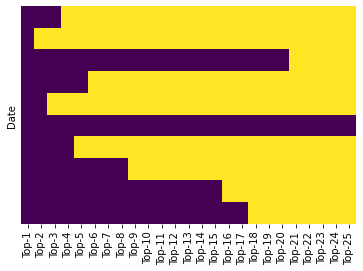

In [31]:
import seaborn as sns
sns.heatmap(df_v.isna(), cbar=False, cmap='viridis', yticklabels=False);

In [33]:
df_v.to_csv('tweets_output.csv')